Training Set Shape: (5634, 20), Test Set Shape: (1409, 20)
New Training Set Shape After SMOTE: (8278, 20)

Model Accuracy (with SMOTE & Class Weights): 0.7353

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1035
         1.0       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.74      0.75      1409



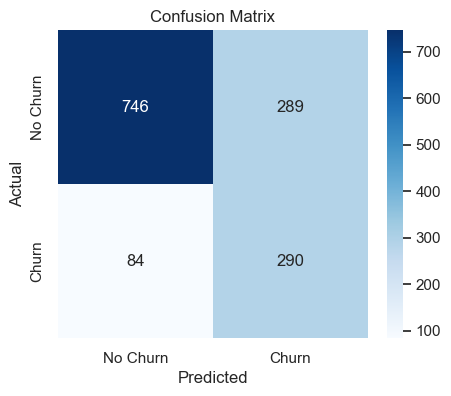


Cross-Validation Recall: 0.8106 ± 0.0195

Improved Model Saved Successfully! ✅


In [1]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
import joblib

# Set visualization style
sns.set(style="whitegrid")

# 📌 Step 2: Load Preprocessed Data
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

print(f"Training Set Shape: {X_train.shape}, Test Set Shape: {X_test.shape}")

# 📌 Step 3: Apply SMOTE to Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"New Training Set Shape After SMOTE: {X_train_resampled.shape}")

# 📌 Step 4: Train Logistic Regression with Class Weights
model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")  # Class weighting
model.fit(X_train_resampled, y_train_resampled)

# 📌 Step 5: Model Evaluation
y_pred = model.predict(X_test)

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (with SMOTE & Class Weights): {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 6: Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📌 Step 7: Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring="recall")

print(f"\nCross-Validation Recall: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 📌 Step 8: Save the Improved Model
joblib.dump(model, "../models/logistic_regression_smote.pkl")
print("\nImproved Model Saved Successfully! ✅")
